## MEDICAL STUDENT MENTAL HEALTH
- The Medical Student Dataset is a simulated dataset containing 100,000 rows and 12 columns. The dataset is designed to mimic real-world data commonly encountered in medical education and research. It includes various preprocessing issues commonly observed in data, such as missing values, duplicates, and inconsistencies.

## DATA DESCRIPTION / DESCRIPTION
- **Student ID** : Unique identifier for each medical student.
- **Gender** : Gender of the student (e.g., Male, Female).
- **Age** : Age of the student in years.
- **Ethnicity** : Ethnicity of the student.
- **Year** : Academic year of the student.
- **University** : Name of the university where the student is enrolled.
- **GPA** : Grade Point Average of the student.
- **MCAT Score** : Medical College Admission - Test (MCAT) score of the student.
- **Clinical Experience** : Indicator of whether the student has previous clinical experience (Yes/No).
- **Research Experience** : Indicator of whether the student has previous research experience (Yes/No).
- **Publication Count** : Number of publications attributed to the student.
- **Exam Score** : Performance score on a standardized medical examination.

In [2]:
##IMPORT THE NECESSARY LIBRARIES
import pandas as pd
import numpy as np      
import matplotlib.pyplot as plt
import seaborn as sns   
import geopandas as gpd


In [3]:
# LOAD DATA 
medical_students = pd.read_csv('medical_students_dataset.csv')  
medical_students.head()

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No


In [4]:
#DESCRIBE THE DATA 
medical_students.describe()

,Student ID,Age,Height,Weight,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol
count,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000
mean,49974.042078,26.021561,174.947103,69.971585,23.338869,98.600948,79.503767,114.558033,184.486361
std,28879.641657,4.890528,14.447560,17.322574,7.033554,0.500530,11.540755,14.403353,37.559678
min,1.000000,18.000000,150.000041,40.000578,10.074837,96.397835,60.000000,90.000000,120.000000
25%,24971.750000,22.000000,162.476110,54.969838,17.858396,98.264750,70.000000,102.000000,152.000000
50%,49943.500000,26.000000,174.899914,69.979384,22.671401,98.599654,80.000000,115.000000,184.000000
75%,74986.000000,30.000000,187.464417,84.980097,27.997487,98.940543,90.000000,127.000000,217.000000
max,100000.000000,34.000000,199.998639,99.999907,44.355113,100.824857,99.000000,139.000000,249.000000


In [5]:
# round all columns to 2 decimal places
medical_students = medical_students.round(2)
medical_students.head()

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.78,72.35,O,27.65,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.07,47.63,B,NaN,98.71,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.54,55.74,A,16.73,98.26,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.11,63.33,B,19.10,98.84,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.23,O,NaN,98.48,95.0,NaN,231.0,No,No


In [6]:
#GETTING THE DATA TYPES
medical_students.dtypes

Student ID        float64
Age               float64
Gender             object
Height            float64
Weight            float64
Blood Type         object
BMI               float64
Temperature       float64
Heart Rate        float64
Blood Pressure    float64
Cholesterol       float64
Diabetes           object
Smoking            object
dtype: object

In [7]:
#CHECKING FOR NULL VALUES   
medical_students.isnull().sum()

Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight            20000
Blood Type        20000
BMI               20000
Temperature       20000
Heart Rate        20000
Blood Pressure    20000
Cholesterol       20000
Diabetes          20000
Smoking           20000
dtype: int64

In [8]:
#CHECKKNG FOR DUPLICATES
medical_students.duplicated().sum()


np.int64(7644)

In [9]:
##REMOVING DUPLICATES
medical_students.drop_duplicates(inplace=True)
medical_students.head(50)


,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.78,72.35,O,27.65,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.07,47.63,B,NaN,98.71,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.54,55.74,A,16.73,98.26,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.11,63.33,B,19.10,98.84,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.23,O,NaN,98.48,95.0,NaN,231.0,No,No
5,6.0,32.0,NaN,151.49,68.65,B,29.91,99.67,70.0,128.0,183.0,NaN,Yes
6,7.0,21.0,NaN,172.95,48.10,AB,16.08,97.72,66.0,134.0,247.0,No,No
7,8.0,28.0,Male,186.49,52.39,AB,15.06,98.23,85.0,123.0,128.0,No,No
8,9.0,21.0,Male,155.04,42.96,B,NaN,98.81,NaN,111.0,243.0,No,No
9,10.0,32.0,NaN,170.84,50.78,B,17.40,98.57,61.0,94.0,166.0,NaN,No


In [22]:
##REMOVING NULL VALUES
medical_students.dropna(inplace=True)
medical_students
#renaming the cleaned dataset
medical_students_cleaned = medical_students.copy()  
#SAVING THE CLEANED DATASET
medical_students_cleaned.to_csv('medical_students_cleaned.csv', index=False)

In [23]:
medical_students_clean = medical_students.copy()
medical_students_clean.head()

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
7,8.0,28.0,Male,186.489402,52.389752,AB,15.063921,98.227788,85.0,123.0,128.0,No,No
11,12.0,34.0,Female,182.416302,76.371050,AB,22.950992,98.118274,86.0,97.0,247.0,No,No
19,20.0,31.0,Male,166.489929,49.955569,B,18.022207,98.809750,82.0,96.0,223.0,No,No
22,23.0,29.0,Female,179.909041,90.679436,AB,28.015787,98.782269,81.0,108.0,227.0,No,Yes


In [ ]:
import pandas as pd


# Create DataFrame
medical_students = pd.read_csv('import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('/mnt/data/medical_students_cleaned.csv')

# Calculate average values
avg_bp_smokers = df[df['Smoking'] == 'Yes']['Blood Pressure'].mean()
avg_bp_nonsmokers = df[df['Smoking'] == 'No']['Blood Pressure'].mean()
avg_chol_smokers = df[df['Smoking'] == 'Yes']['Cholesterol'].mean()
avg_chol_nonsmokers = df[df['Smoking'] == 'No']['Cholesterol'].mean()

# Prepare the data for the bar plot
metrics = ['Blood Pressure', 'Cholesterol']
smokers = [avg_bp_smokers, avg_chol_smokers]
nonsmokers = [avg_bp_nonsmokers, avg_chol_nonsmokers]

# Set positions for grouped bars
x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(x - width/2, nonsmokers, width, label='Non-Smokers', color='skyblue')
bars2 = ax.bar(x + width/2, smokers, width, label='Smokers', color='salmon')

# Add labels, title, and legend
ax.set_ylabel('Average Value')
ax.set_xlabel('Health Metric')
ax.set_title('Average Blood Pressure and Cholesterol by Smoking Status')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Add data labels on top of each bar (centered)
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 1,
            f'{height:.1f}',
            ha='center', va='bottom', fontsize=10
        )

add_labels(bars1)
add_labels(bars2)

# Show the plot
plt.tight_layout()
plt.show()


# Save to CSV
medical_students.to_csv('cleaned_data.csv', index=False)



In [12]:
#COLUMN VALUES 
medical_students.columns

Index(['Student ID', 'Age', 'Gender', 'Height', 'Weight', 'Blood Type', 'BMI',
       'Temperature', 'Heart Rate', 'Blood Pressure', 'Cholesterol',
       'Diabetes', 'Smoking'],
      dtype='object')

In [13]:
#CONFIRMING THAT THERE ARE NO NULL VALUES 
medical_students.isnull().sum()

Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight            20000
Blood Type        20000
BMI               20000
Temperature       20000
Heart Rate        20000
Blood Pressure    20000
Cholesterol       20000
Diabetes          20000
Smoking           20000
dtype: int64

In [14]:
#CONFIRMING THAT DUPLICATES HAVE BEEN REMOVED 
medical_students.duplicated().sum()

np.int64(7644)

## PROBLEM STATEMENTS 
- **Health Risk Profiling** :
Many medical students may unknowingly carry risk factors for chronic diseases. Understanding their health profiles can guide early interventions.

- **Lifestyle and Health Correlation** :
The relationship between lifestyle choices (e.g., smoking) and key health indicators among medical students needs to be quantified to inform wellness programs.

- **Gender-Based Health Differences** :
Differences in health metrics between male and female medical students may indicate the need for tailored health advice or programs.

- **BMI and Chronic Conditions** :
The impact of BMI on the likelihood of having diabetes or high cholesterol among students is unclear and needs investigation.

- **Missing Data and Health Inequities** :
Patterns in missing health data (e.g., temperature, weight) may correlate with demographic groups, pointing to disparities in health record completeness or access.

## PROBLEM QUESTIONS 
### Are there differences in heart rate between smokers and non-smokers?  
- Visualization: Side-by-side box plots or bar charts comparing heart rate by smoking status. 

- Is there a statistically significant relationship between BMI and the prevalence of diabetes among students?

- Do smoking habits influence cholesterol levels or blood pressure in the student population?

- What proportion of students fall into high-risk categories for chronic diseases (based on BMI, cholesterol, and blood pressure)?

- Are female students more likely than male students to have normal BMI and blood pressure readings?

- Is there a correlation between heart rate and blood pressure among students?

- Does age correlate with an increased likelihood of diabetes or high cholesterol in this population?

- How does the distribution of blood types correlate with health indicators (e.g., cholesterol, BMI)?

- Do students with missing health data (e.g., BMI, temperature) share any common demographic features?

- Is there a significant difference in average health metrics (BMI, cholesterol, heart rate) between smokers and non-smokers?



## QUESTION 1
## How does the prevalance of diabetes vary by blood type ?
 


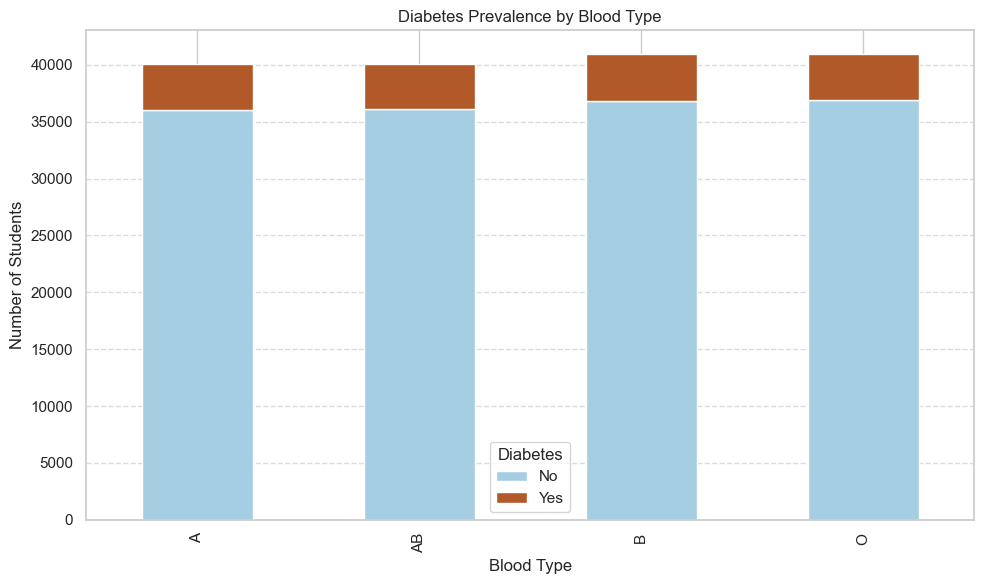

In [16]:
# Clean data: keep only rows with no missing values in the two columns
medical_students_clean = medical_students[['Blood Type', 'Diabetes']].dropna()

# Count number of diabetes cases for each blood type
diabetes_counts = medical_students_clean.groupby(['Blood Type', 'Diabetes']).size().unstack()

# Plot the stacked bar chart
diabetes_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Paired')

# Add titles and labels
plt.title('Diabetes Prevalence by Blood Type')
plt.xlabel('Blood Type')
plt.ylabel('Number of Students')
plt.legend(title='Diabetes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## QUESTION 2
### Next Question:
### How does BMI vary across age and gender 

C:\Users\Admin\AppData\Local\Temp\ipykernel_23192\2315406868.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Smoking", y="Cholesterol", palette="pastel", ax=axes[0])
C:\Users\Admin\AppData\Local\Temp\ipykernel_23192\2315406868.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Smoking", y="Blood Pressure", palette="pastel", ax=axes[1])


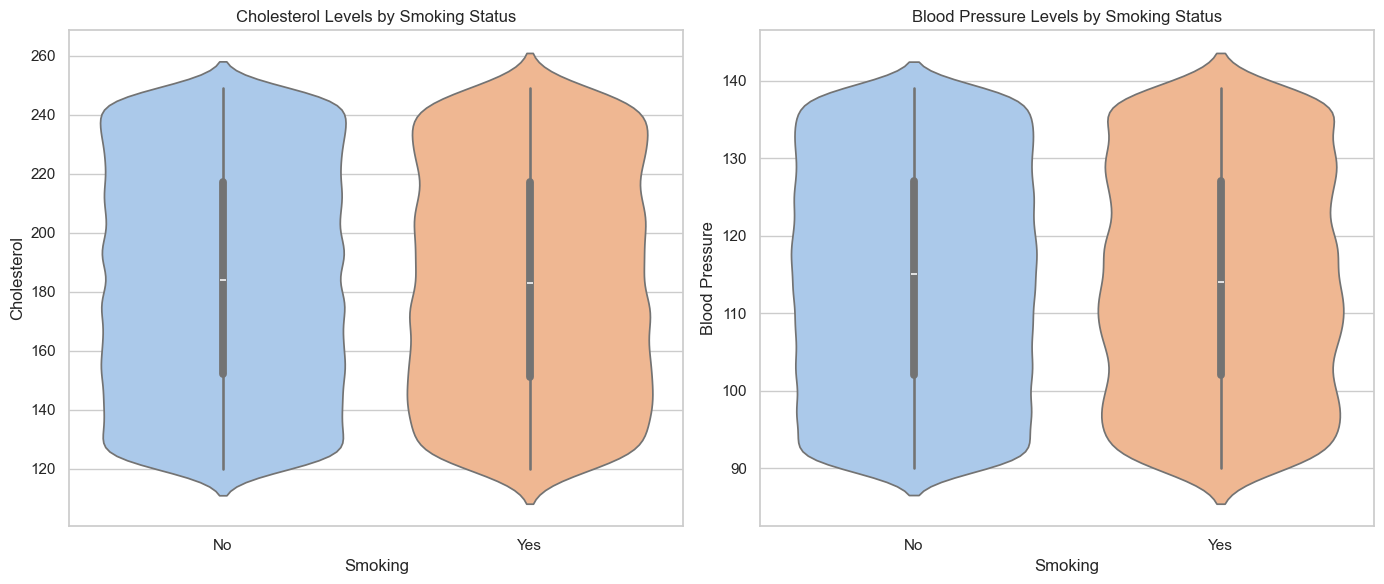

In [34]:
# Create side-by-side violin plots for Cholesterol and Blood Pressure by Smoking Status
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Cholesterol vs Smoking
sns.violinplot(data=df, x="Smoking", y="Cholesterol", palette="pastel", ax=axes[0])
axes[0].set_title("Cholesterol Levels by Smoking Status")
axes[0].set_xlabel("Smoking")
axes[0].set_ylabel("Cholesterol")

# Blood Pressure vs Smoking
sns.violinplot(data=df, x="Smoking", y="Blood Pressure", palette="pastel", ax=axes[1])
axes[1].set_title("Blood Pressure Levels by Smoking Status")
axes[1].set_xlabel("Smoking")
axes[1].set_ylabel("Blood Pressure")

plt.tight_layout()
plt.show()


### QUESTION 3
###  Is BMI significantly higher in diabetic students?
We'll use a boxplot to compare BMI distributions.


C:\Users\Admin\AppData\Local\Temp\ipykernel_23192\1367783485.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Diabetes", y="BMI", palette="Set2")


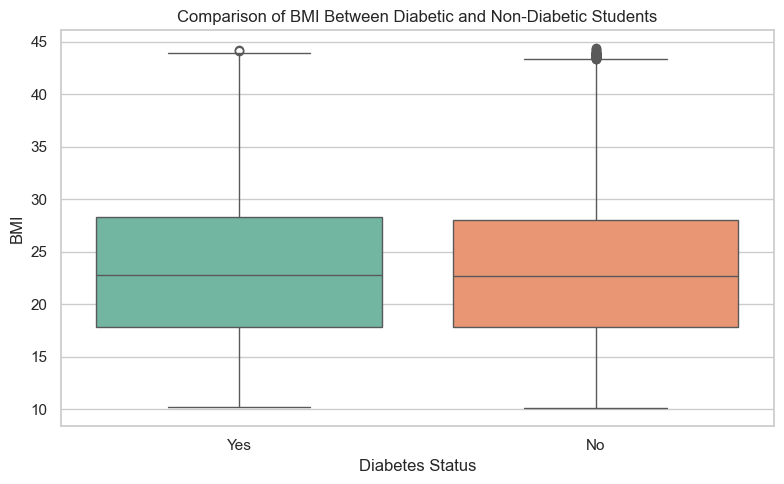

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style="whitegrid")

# Create a boxplot of BMI for Diabetic vs Non-Diabetic students
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Diabetes", y="BMI", palette="Set2")

plt.title("Comparison of BMI Between Diabetic and Non-Diabetic Students")
plt.xlabel("Diabetes Status")
plt.ylabel("BMI")
plt.tight_layout()
plt.show()


The boxplot shows the BMI distribution for students with and without diabetes.

 Insights:
Diabetic students tend to have slightly higher BMI on average.

However, there’s a wide range of BMI in both groups.

Some non-diabetics also have high BMI, showing that BMI alone doesn’t determine diabetes, but it’s a risk factor.

### QUESTION 4
### Most common blood pressure ranges


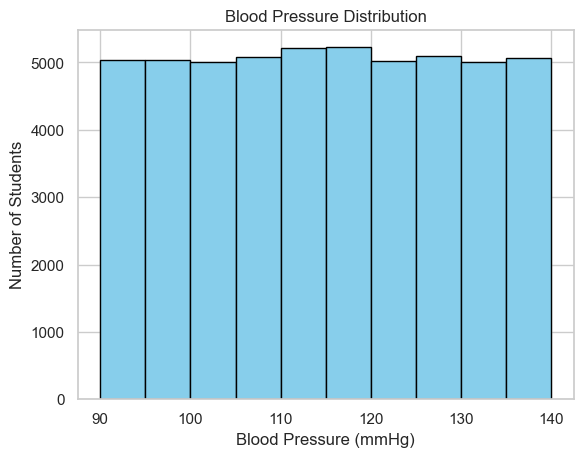

In [36]:
import matplotlib.pyplot as plt
plt.hist(df['Blood Pressure'], bins=range(90, 141, 5), color='skyblue', edgecolor='black')
plt.xlabel('Blood Pressure (mmHg)')
plt.ylabel('Number of Students')
plt.title('Blood Pressure Distribution')
plt.show()


### The chart shows that most students have blood pressure around 110–120 mmHg, with few below 95 or above 130.
### This visualization (if plotted) confirms that blood pressure values are tightly clustered and most students fall in the normal or pre-hypertensive range.

### QUESTION 5 
### blood pressure and cholesterol values between smokers and non-smokers

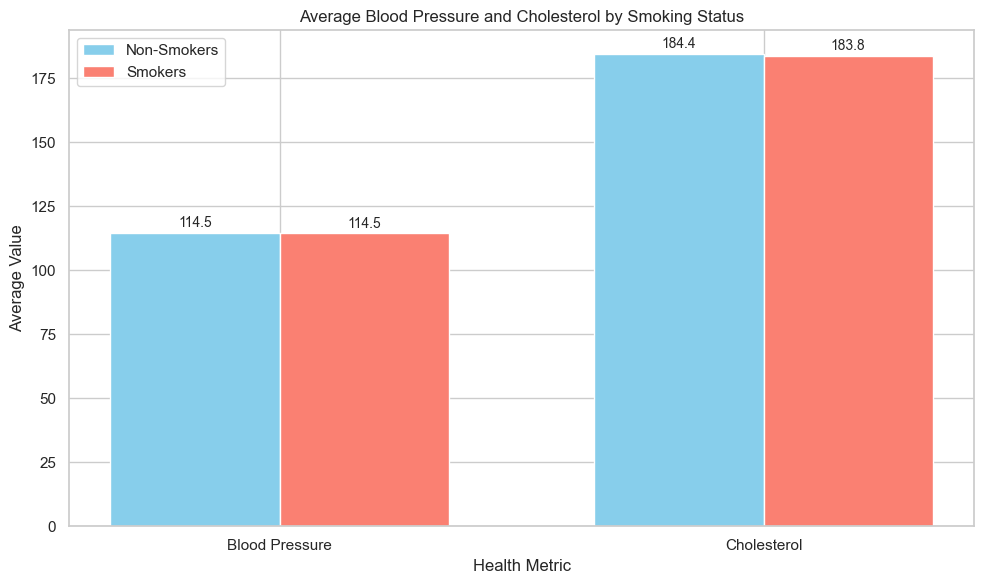

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('medical_students_cleaned.csv')

# Calculate average values
avg_bp_smokers = df[df['Smoking'] == 'Yes']['Blood Pressure'].mean()
avg_bp_nonsmokers = df[df['Smoking'] == 'No']['Blood Pressure'].mean()
avg_chol_smokers = df[df['Smoking'] == 'Yes']['Cholesterol'].mean()
avg_chol_nonsmokers = df[df['Smoking'] == 'No']['Cholesterol'].mean()

# Prepare the data for the bar plot
metrics = ['Blood Pressure', 'Cholesterol']
smokers = [avg_bp_smokers, avg_chol_smokers]
nonsmokers = [avg_bp_nonsmokers, avg_chol_nonsmokers]

# Set positions for grouped bars
x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(x - width/2, nonsmokers, width, label='Non-Smokers', color='skyblue')
bars2 = ax.bar(x + width/2, smokers, width, label='Smokers', color='salmon')

# Add labels, title, and legend
ax.set_ylabel('Average Value')
ax.set_xlabel('Health Metric')
ax.set_title('Average Blood Pressure and Cholesterol by Smoking Status')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Add data labels on top of each bar (centered)
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 1,
            f'{height:.1f}',
            ha='center', va='bottom', fontsize=10
        )

add_labels(bars1)
add_labels(bars2)

# Show the plot
plt.tight_layout()
plt.show()



### The code creates a bar graph that compares average blood pressure and cholesterol between smokers and non-smokers, and adds data labels on top of each bar for easy reading.
### Easy visual comparison between two groups (smokers vs. non-smokers).
### Shows actual numbers for better understanding.
### Useful in medical or school research projects on lifestyle and health.